# *Heart Disease Prediction* 

### Source - https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

### *Aim :* To predict wether the a Respondents will ever have coronary heart disease (CHD) or myocardial infarction (MI) 

In [1]:
# import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Read the database
filepath = 'heart_2020_cleaned.csv' 
data = pd.read_csv(filepath)
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


## *Data Exploration*

#### Data Description
* HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
* BMI: Body Mass Index (BMI).
* Smoking: Have you smoked at least 100 cigarettes in your entire life?
* AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
* Stroke: (Ever told) (you had) a stroke?
* PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
* MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
* DiffWalking: Do you have serious difficulty walking or climbing stairs?
* Sex: Are you male or female?
* AgeCategory: Fourteen-level age category. (then calculated the mean)
* Race: Imputed race/ethnicity value.
* Diabetic: (Ever told) (you had) diabetes?
* PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
* GenHealth: Would you say that in general your health is...
* SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
* Asthma: (Ever told) (you had) asthma?
* KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
* SkinCancer: (Ever told) (you had) skin cancer?

In [3]:
data.info()
# The data is aldready preprocessed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## *Data Precprocessing*

In [4]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: encode_AgeCategory[x])

In [5]:
# Column Statistics (of numerical data) 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
AgeCategory,319795.0,54.355759,17.720429,21.00,42.00,57.00,67.00,80.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [6]:
# fortunately There are no numerical outliers in the given dataset 
data.Diabetic.unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [7]:
def Diabetic_ch(x):
    if 'Yes' in x:
        return 'Yes'
    elif 'No' in x:
        return 'No'
    else:
        return 'No'
data['Diabetic']=data.Diabetic.apply(Diabetic_ch)
data.Diabetic.unique()

array(['Yes', 'No'], dtype=object)

In [8]:
print("Name \t\t Counts \t Values ")
for col in list(data.columns[data.dtypes==object]):
    print(col , len(data[col].unique()) , list(data[col].unique()) )
    

Name 		 Counts 	 Values 
HeartDisease 2 ['No', 'Yes']
Smoking 2 ['Yes', 'No']
AlcoholDrinking 2 ['No', 'Yes']
Stroke 2 ['No', 'Yes']
DiffWalking 2 ['No', 'Yes']
Sex 2 ['Female', 'Male']
Race 6 ['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic']
Diabetic 2 ['Yes', 'No']
PhysicalActivity 2 ['Yes', 'No']
GenHealth 5 ['Very good', 'Fair', 'Good', 'Poor', 'Excellent']
Asthma 2 ['Yes', 'No']
KidneyDisease 2 ['No', 'Yes']
SkinCancer 2 ['Yes', 'No']


In [9]:
encode_GenHealth = {'Very good':4, 'Fair':2, 'Good':3, 'Poor':1, 'Excellent':5}
data['GenHealth'] = data['GenHealth'].apply(lambda x: encode_GenHealth[x])

In [10]:
from sklearn.preprocessing import LabelEncoder
for col in data.columns:
        if data[col].dtype == 'O':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int32  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int32  
 11  Diabetic          319795 non-null  int32  
 12  PhysicalActivity  319795 non-null  int32  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int32  
 16  KidneyDisease     31

## *EDA*

### *Correlation analysis*

<AxesSubplot:>

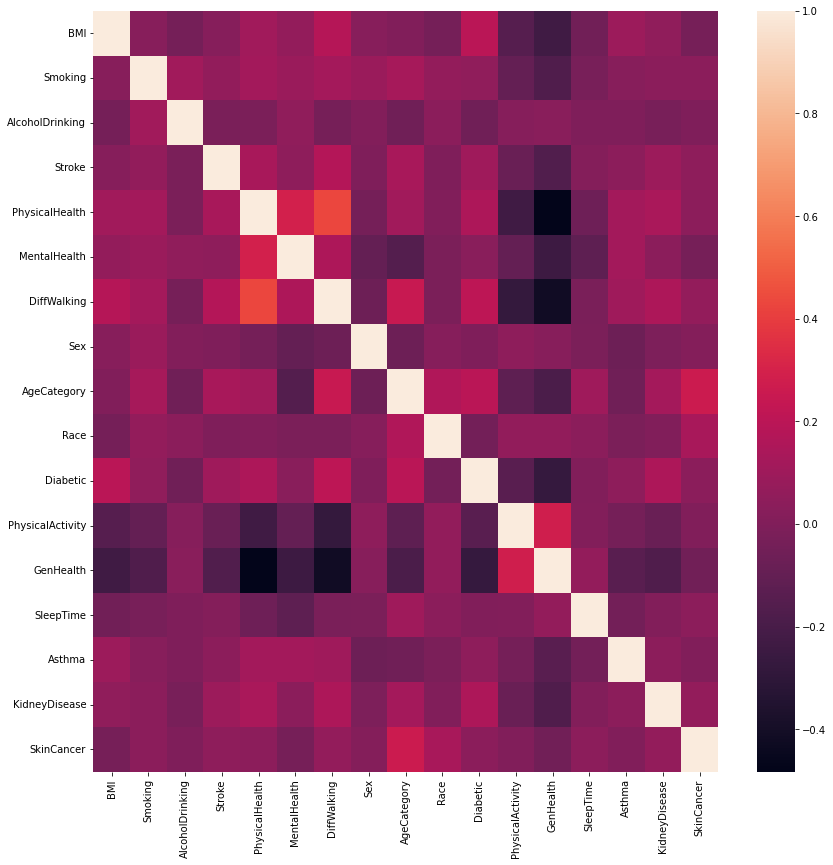

In [12]:
feature_cols = data.columns[1:]
corr_values = data[feature_cols].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr_values)

##### We can notice a higher correlation of 0.5 between physical health and difficulty in walking which kinda makes sense

<AxesSubplot:title={'center':'Distribution of correlation of features'}>

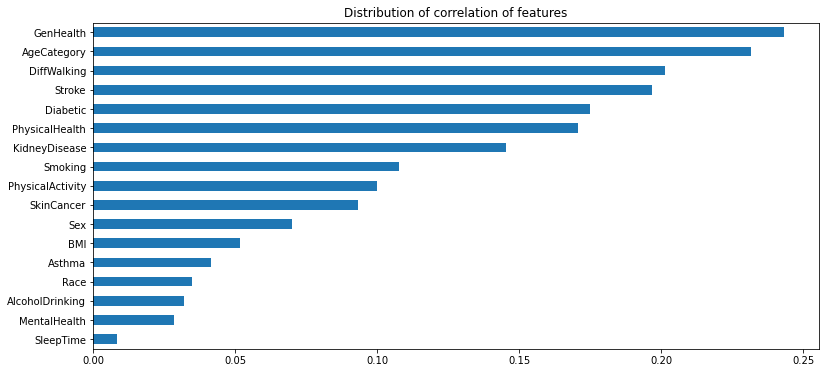

In [13]:
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(data.corr()['HeartDisease']).sort_values()[:-1].plot.barh()

### *Analysis on Target Variablle*

0    0.914405
1    0.085595
Name: HeartDisease, dtype: float64

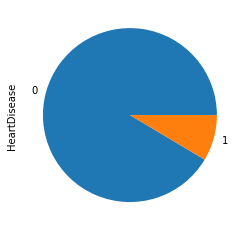

In [14]:
ax=data['HeartDisease'].value_counts(normalize=True).plot(kind='pie')
data['HeartDisease'].value_counts(normalize=True)
# We can see that the target variable is skewed and thus we will have to use stratified shuffle split 

### *Train Test Slpit*

In [15]:
feature_cols = list(data.columns[1:])

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                            test_size=0.3,
                                            random_state=42)   

train_idx , test_idx = next(strat_shuf_split.split( data[feature_cols] , data.HeartDisease))



In [17]:
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'HeartDisease']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'HeartDisease']

In [18]:
# Checking 
print(y_train.value_counts(normalize=True))
y_test.value_counts(normalize=True)

0    0.914405
1    0.085595
Name: HeartDisease, dtype: float64


0    0.914404
1    0.085596
Name: HeartDisease, dtype: float64

# *Model Training*

### Logistic Regression

In [52]:
## Simple Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight={0:1 , 1:20})
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

D:\Computer science\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

confusion_matrix(y_test,y_pred)

array([[52142, 35585],
       [  883,  7329]], dtype=int64)

In [54]:
from sklearn.metrics import  classification_report, f1_score
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.98      0.59      0.74     87727
           1       0.17      0.89      0.29      8212

    accuracy                           0.62     95939
   macro avg       0.58      0.74      0.51     95939
weighted avg       0.91      0.62      0.70     95939

Accuracy score:  0.62
F1 Score:  0.29


Text(0.5, 69.0, 'Prediction ')

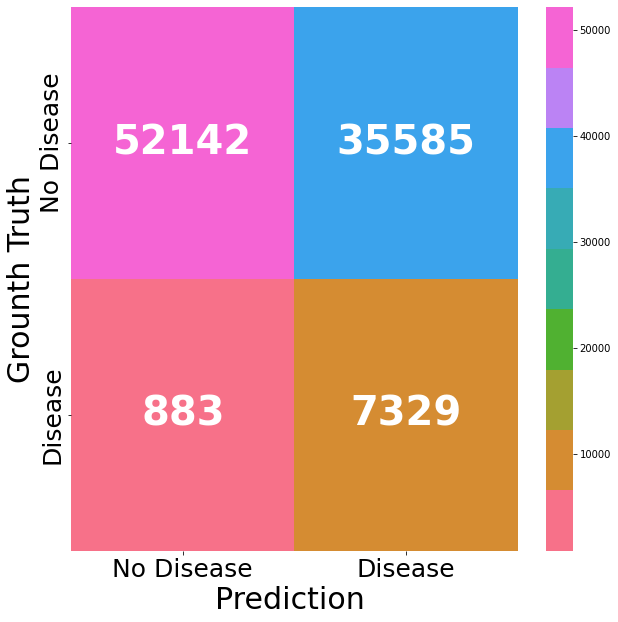

In [55]:
# Plot confusion matrix
sns.set_palette(sns.color_palette("husl", 9))
_, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), 
                    annot=True, fmt='d',
                    cmap=sns.color_palette("husl", 9), 
                    annot_kws={"size": 40, "weight": "bold"}
                    )  
labels = ['No Disease', 'Disease']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Grounth Truth', fontsize=30);
ax.set_xlabel('Prediction ', fontsize=30)
### END SOLUTION

### Linear SVM

In [42]:
## Linear SVM 
from sklearn.svm import LinearSVC
svm = LinearSVC(class_weight={0:1 , 1:10})
svm.fit(X_train,y_train) 
svm_pred = svm.predict(X_test)


D:\Computer science\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [43]:

print(classification_report(y_test, svm_pred))
print('Accuracy score: ', round(accuracy_score(y_test, svm_pred), 2))
print('F1 Score: ', round(f1_score(y_test, svm_pred)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     87727
           1       0.59      0.04      0.08      8212

    accuracy                           0.92     95939
   macro avg       0.76      0.52      0.52     95939
weighted avg       0.89      0.92      0.88     95939

Accuracy score:  0.92
F1 Score:  0


Text(0.5, 69.0, 'Prediction ')

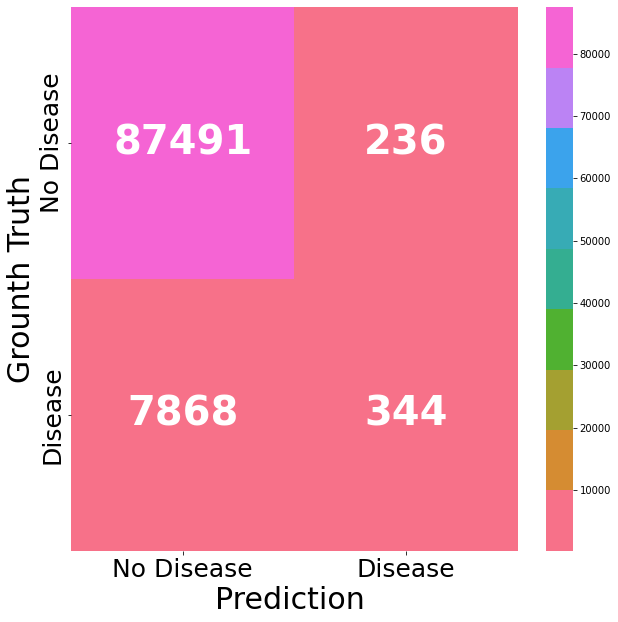

In [44]:
#SVC turns out to be the worst 

sns.set_palette(sns.color_palette("husl", 9))
_, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(confusion_matrix(y_test, svm_pred), 
                    annot=True, fmt='d',
                    cmap=sns.color_palette("husl", 9), 
                    annot_kws={"size": 40, "weight": "bold"}
                    )  
labels = ['No Disease', 'Disease']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Grounth Truth', fontsize=30);
ax.set_xlabel('Prediction ', fontsize=30)

### K-Nearest Neigbhours 

In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
yknn_pred = knn.predict(X_test)

In [46]:

print(classification_report(y_test, yknn_pred))
print('Accuracy score: ', round(accuracy_score(y_test, yknn_pred), 2))
print('F1 Score: ', round(f1_score(y_test, yknn_pred)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87727
           1       0.28      0.09      0.14      8212

    accuracy                           0.90     95939
   macro avg       0.60      0.54      0.54     95939
weighted avg       0.86      0.90      0.88     95939

Accuracy score:  0.9
F1 Score:  0


Text(0.5, 69.0, 'Prediction ')

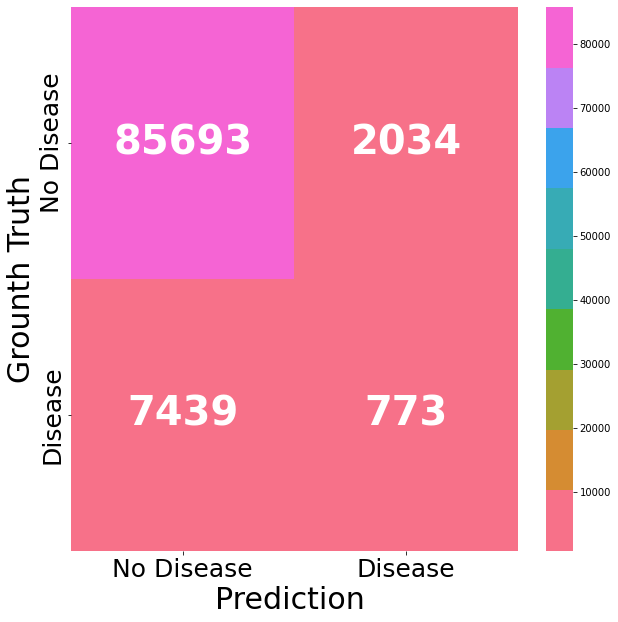

In [47]:
sns.set_palette(sns.color_palette("husl", 9))
_, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(confusion_matrix(y_test, yknn_pred), 
                    annot=True, fmt='d',
                    cmap=sns.color_palette("husl", 9), 
                    annot_kws={"size": 40, "weight": "bold"}
                    )  
labels = ['No Disease', 'Disease']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Grounth Truth', fontsize=30);
ax.set_xlabel('Prediction ', fontsize=30)

In [35]:
## Linear SVM 
from sklearn.svm import LinearSVC
svm = LinearSVC(class_weight={0:10 , 1:1})
svm.fit(X_train,y_train) 
svm_pred = svm.predict(X_test)


D:\Computer science\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1,
                            class_weight={0:1,1:10} )
RF.fit(X_train,y_train)


RandomForestClassifier(class_weight={0: 1, 1: 10}, n_jobs=-1, oob_score=True,
                       random_state=42, warm_start=True)

In [50]:
rf_pred = RF.predict(X_test)

print(classification_report(y_test, rf_pred))
print('Accuracy score: ', round(accuracy_score(y_test, rf_pred), 2))
print('F1 Score: ', round(f1_score(y_test, rf_pred)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87727
           1       0.31      0.10      0.15      8212

    accuracy                           0.90     95939
   macro avg       0.62      0.54      0.55     95939
weighted avg       0.87      0.90      0.88     95939

Accuracy score:  0.9
F1 Score:  0


Text(0.5, 69.0, 'Prediction ')

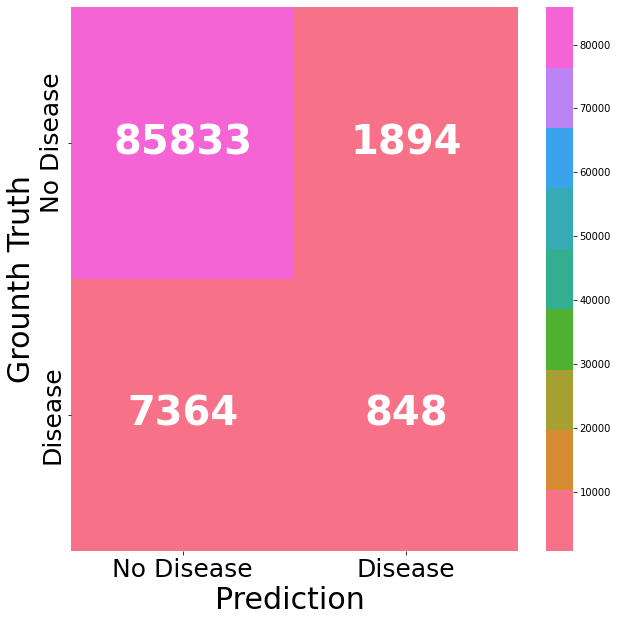

In [51]:
sns.set_palette(sns.color_palette("husl", 9))
_, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(confusion_matrix(y_test, rf_pred), 
                    annot=True, fmt='d',
                    cmap=sns.color_palette("husl", 9), 
                    annot_kws={"size": 40, "weight": "bold"}
                    )  
labels = ['No Disease', 'Disease']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Grounth Truth', fontsize=30);
ax.set_xlabel('Prediction ', fontsize=30)